In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


--2024-11-10 18:53:35--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [ <=>                ] 999.85K  --.-KB/s    in 0.06s   

2024-11-10 18:53:35 (16.1 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [2]:
!unzip bank+marketing.zip
!unzip bank.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [3]:
import numpy as np
import pandas as pd
import sklearn as sk

In [4]:
df1 = pd.read_csv("bank.csv", sep=";")

In [5]:
df = df1[['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']]
df['y'] = df['y'].map({'yes': 1, 'no': 0})

<ipython-input-5-d67eb90deea1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [6]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,0


In [30]:
from sklearn.model_selection import train_test_split
X = df.drop("y", axis = 1)
y = df[["y"]]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [12]:
from sklearn.metrics import roc_auc_score
numerical_features = df.select_dtypes(include = ["int", "float"]).columns
auc_scores = {}

for feature in numerical_features:
  auc = roc_auc_score(df["y"], df[feature])
  if auc < 0.5:
    auc = roc_auc_score(df["y"], -df[feature])
  auc_scores[feature] = auc

auc_scores = sorted(auc_scores.items(), key=lambda x: x[1], reverse = True)
print(auc_scores)

[('y', 1.0), ('duration', 0.815007197696737), ('previous', 0.6001859404990403), ('pdays', 0.59103886756238), ('balance', 0.5713865163147792), ('campaign', 0.5560083973128599), ('age', 0.5147024952015355), ('day', 0.5106698656429942)]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
# Преобразуем данные в формат словарей для DictVectorizer
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')

# Применяем one-hot encoding
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

# Обучение модели логистической регрессии
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Оценка модели на валидационном наборе данных
y_pred = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)

print(f"ROC AUC на валидационной выборке: {roc_auc:.3f}")


ROC AUC на валидационной выборке: 0.857


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ipython-input-22-7690b3ab0fe0>:25: RuntimeWarning: invalid value encountered in scalar divide
  F1.append(round(2*(precision*recall/(precision+recall)), 2))
<ipython-input-22-7690b3ab0fe0>:25: RuntimeWarning: invalid value encountered in scalar divide
  F1.append(round(2*(precision*recall/(precision+recall)), 2))
<ipython-input-22-7690b3ab0fe0>:25: RuntimeWarning: invalid value encountered in scalar divide
  F1.append(round(2*(precision*recall/(precision+recall)), 2))


порог максимума: 0.17 max F1: 0.47
[0.2, 0.22, 0.26, 0.3, 0.33, 0.37, 0.39, 0.42, 0.44, 0.44, 0.46, 0.46, 0.45, 0.45, 0.44, 0.44, 0.46, 0.47, 0.45, 0.44, 0.43, 0.44, 0.43, 0.44, 0.44, 0.45, 0.45, 0.45, 0.44, 0.44, 0.44, 0.45, 0.45, 0.43, 0.44, 0.43, 0.41, 0.42, 0.43, 0.41, 0.41, 0.4, 0.4, 0.41, 0.4, 0.4, 0.39, 0.39, 0.38, 0.36, 0.37, 0.37, 0.36, 0.36, 0.36, 0.36, 0.34, 0.34, 0.34, 0.34, 0.34, 0.33, 0.32, 0.32, 0.29, 0.27, 0.26, 0.23, 0.22, 0.2, 0.19, 0.19, 0.18, 0.18, 0.18, 0.18, 0.16, 0.16, 0.16, 0.16, 0.16, 0.15, 0.13, 0.13, 0.13, 0.1, 0.09, 0.09, 0.09, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.04, 0.02, 0.02, nan, nan, nan]


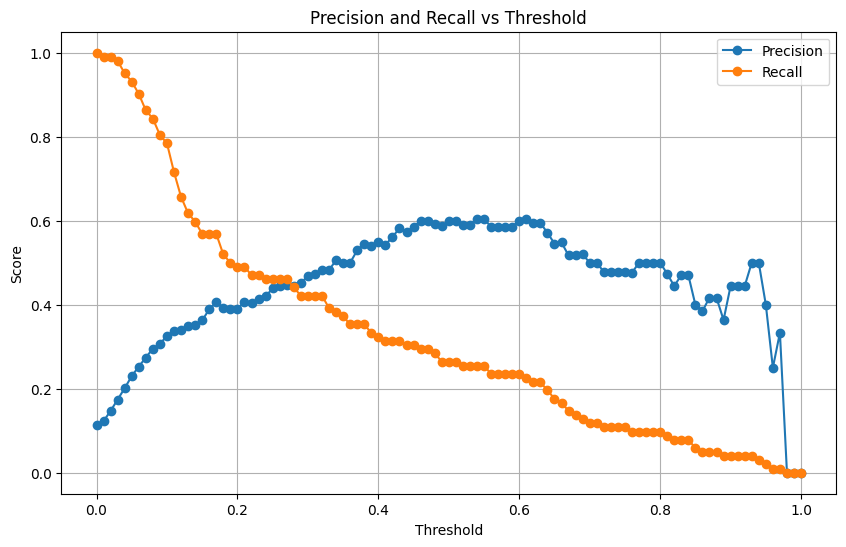

Precision и Recall пересекаются при пороге: 0.28


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Шаг 1: Предсказание вероятностей
y_pred_prob = model.predict_proba(X_val)[:, 1]

# Шаг 2: Инициализация списков для precision и recall
thresholds = np.arange(0.0, 1.01, 0.01)
precisions = []
recalls = []
F1 = []

# Вычисляем precision и recall для каждого порога
for threshold in thresholds:
    # Преобразуем вероятности в предсказания (0 или 1) в зависимости от порога
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Вычисляем precision и recall
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)

    precisions.append(precision)
    recalls.append(recall)
    F1.append(round(2*(precision*recall/(precision+recall)), 2))

# Шаг 3: Построение графиков
print("порог максимума:", F1.index(max(F1))/100, "max F1:", max(F1))
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 4: Нахождение точки пересечения
for i in range(len(thresholds)):
    if np.isclose(precisions[i], recalls[i], atol=0.01):
        print(f"Precision и Recall пересекаются при пороге: {thresholds[i]:.2f}")
        break


In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Инициализация KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Список для хранения AUC значений по каждому фолду
auc_scores = []

# Итерация по фолдам
for train_index, val_index in kf.split(X_train):
    # Разделение на обучающую и валидационную выборки
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Преобразование данных в словари для DictVectorizer
    train_dict = X_train_fold.to_dict(orient='records')
    val_dict = X_val_fold.to_dict(orient='records')

    # Применение one-hot encoding с DictVectorizer
    dv = DictVectorizer(sparse=False)
    X_train_encoded = dv.fit_transform(train_dict)
    X_val_encoded = dv.transform(val_dict)

    # Обучение модели логистической регрессии
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train_fold)

    # Предсказание вероятностей для валидационной выборки
    y_pred = model.predict_proba(X_val_encoded)[:, 1]

    # Вычисление метрики AUC
    auc = roc_auc_score(y_val_fold, y_pred)
    auc_scores.append(auc)

    print(f"AUC на текущем фолде: {auc:.3f}")

# Среднее значение AUC по всем фолдам
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

# Вычисление стандартной ошибки
se_auc = std_auc / np.sqrt(len(auc_scores))

# Вывод результата
print(f"\nСреднее значение AUC по всем фолдам: {mean_auc:.3f}")
print(f"Стандартное отклонение AUC по всем фолдам: {std_auc:.3f}")
print(f"Стандартная ошибка AUC: {se_auc:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC на текущем фолде: 0.882


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC на текущем фолде: 0.867


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC на текущем фолде: 0.912
AUC на текущем фолде: 0.852
AUC на текущем фолде: 0.899

Среднее значение AUC по всем фолдам: 0.882
Стандартное отклонение AUC по всем фолдам: 0.022
Стандартная ошибка AUC: 0.010


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Загрузите данные
data = pd.read_csv('bank.csv', sep=';')

# Оставьте только нужные столбцы
columns_to_keep = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]
data = data[columns_to_keep]

# Преобразование целевой переменной в числовой формат
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Преобразование категориальных признаков в числовой формат с помощью one-hot encoding
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome'])

# Разделение признаков и целевой переменной
X = data.drop(columns=['y'])
y = data['y']

# Разделение на обучающую (60%) и промежуточную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

# Разделение промежуточной выборки на валидационную (20%) и тестовую (20%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Инициализация KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Список значений C для перебора
C_values = [0.000001, 0.001, 1]

# Переменные для хранения лучших значений
best_C = None
best_mean_score = -np.inf
best_std = np.inf

# Перебор значений C
for C in C_values:
    # Создаем пайплайн с масштабированием и логистической регрессией
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver='liblinear', C=C, max_iter=1000))
    ])

    # Кросс-валидация
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    mean_score = round(scores.mean(), 3)
    std_score = round(scores.std(), 3)

    print(f'C={C}: mean={mean_score}, std={std_score}')

    # Проверяем, является ли текущее значение лучшим
    if mean_score > best_mean_score or (mean_score == best_mean_score and std_score < best_std):
        best_C = C
        best_mean_score = mean_score
        best_std = std_score

print(f'Лучшее значение C: {best_C}, средняя оценка: {best_mean_score}, стандартное отклонение: {best_std}')


C=1e-06: mean=0.874, std=0.024
C=0.001: mean=0.896, std=0.024
C=1: mean=0.905, std=0.018
Лучшее значение C: 1, средняя оценка: 0.905, стандартное отклонение: 0.018
